# Flight Price Prediction

In [24]:
#importing required libreries
import pandas as pd
import numpy as np
import seaborn as sns

## Examining The Dataset

In [12]:
#reading excel file
df= pd.read_excel('Test_set.xlsx')

In [13]:
#cheching dataset head
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [16]:
#checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


* There are only object type data in dataset

In [14]:
#checking dataset shape
df.shape

(2671, 10)

* There are 2671 rows and 10 columns.

In [17]:
#checking dataset type
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [18]:
#checking additional information
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Long layover', 'Business class',
       'Change airports'], dtype=object)

* Target and Dependent variables is discrete and categorical in nature

In [19]:
#getting additional info
df.loc[df['Additional_Info']==' ']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info


In [20]:
#checking null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

* There are no null values here.

In [22]:
#making dataframe for the Nominal data
df_visualization_nominal=df[['Airline','Date_of_Journey','Source','Destination','Route','Dep_Time','Arrival_Time','Duration','Total_Stops']].copy()

In [23]:
#checking 
df_visualization_nominal.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops'],
      dtype='object')

* Now dataset contains 9 nominal columns.

## Data Visualization 

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64


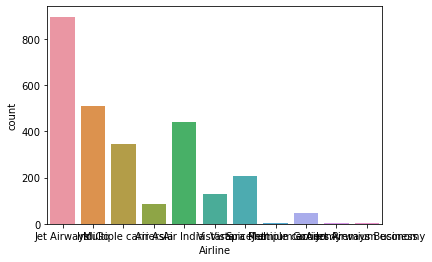

In [25]:
#ploting countplot
ax=sns.countplot(x='Airline',data=df_visualization_nominal)
print(df_visualization_nominal['Airline'].value_counts())

* Look like dataset columns normal

9/05/2019     144
12/06/2019    135
18/05/2019    129
6/06/2019     127
9/06/2019     119
21/05/2019    118
15/05/2019    106
15/06/2019    105
6/03/2019      97
21/03/2019     93
3/06/2019      92
1/06/2019      88
24/06/2019     85
1/04/2019      78
24/03/2019     78
27/06/2019     75
6/05/2019      73
24/05/2019     71
12/05/2019     68
27/03/2019     65
27/05/2019     65
1/05/2019      62
3/03/2019      62
9/03/2019      55
12/03/2019     43
18/03/2019     41
01/03/2019     34
15/03/2019     33
3/04/2019      28
06/03/2019     28
3/05/2019      27
03/03/2019     26
9/04/2019      24
21/06/2019     24
15/04/2019     23
18/06/2019     22
21/04/2019     22
09/03/2019     21
24/04/2019     21
27/04/2019     15
6/04/2019      14
1/03/2019      12
18/04/2019     12
12/04/2019     11
Name: Date_of_Journey, dtype: int64


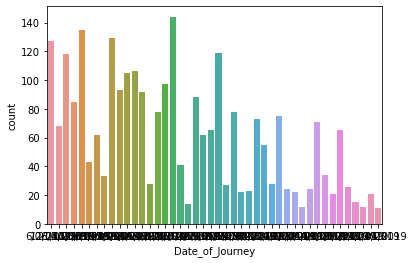

In [26]:
# ploting sns count plot to Date of journey
ax=sns.countplot(x='Date_of_Journey',data=df_visualization_nominal)
print(df_visualization_nominal['Date_of_Journey'].value_counts())

* Look like normal distribution in date of journey in this plot

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64


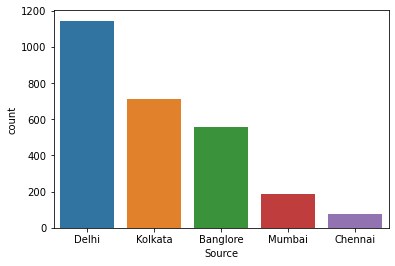

In [29]:
#ploting sns countplot for Source
ax=sns.countplot(x='Source',data=df_visualization_nominal)
print(df_visualization_nominal['Source'].value_counts())

* looks like this column is destributed normally

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


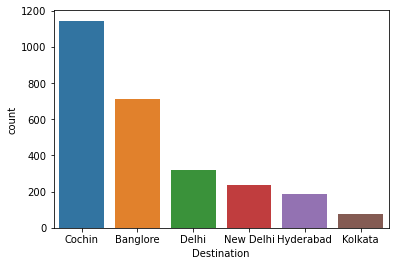

In [28]:
# ploting sns plot for Destination
ax=sns.countplot(x='Destination',data=df_visualization_nominal)
print(df_visualization_nominal['Destination'].value_counts())

* Nominal data in Destination column

DEL → BOM → COK                624
BLR → DEL                      389
CCU → BOM → BLR                253
CCU → BLR                      172
BOM → HYD                      164
                              ... 
CCU → BBI → IXR → DEL → BLR      1
BLR → VGA → VTZ → DEL            1
CCU → BBI → HYD → BLR            1
BLR → NAG → DEL                  1
BLR → BOM → IDR → DEL            1
Name: Route, Length: 100, dtype: int64


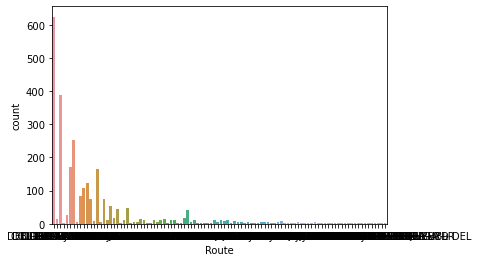

In [30]:
#ploting sns countplot for Route
ax=sns.countplot(x='Route',data=df_visualization_nominal)
print(df_visualization_nominal['Route'].value_counts())

* This count plot contains Rote nominal data

10:00    62
18:55    55
20:00    53
14:05    51
17:00    48
         ..
13:30     1
16:15     1
01:35     1
10:25     1
02:30     1
Name: Dep_Time, Length: 199, dtype: int64


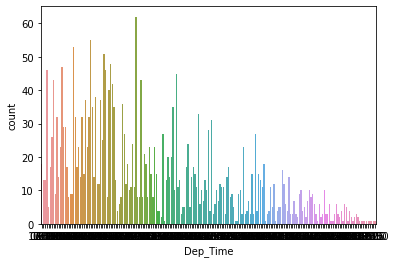

In [31]:
#ploting sns countplot for Dpe_time
ax=sns.countplot(x='Dep_Time',data=df_visualization_nominal)
print(df_visualization_nominal['Dep_Time'].value_counts())

* The dep time plot contains looks like normally distributed

19:00           113
21:00           106
19:15           101
12:35            37
16:10            31
               ... 
15:05 07 May      1
06:50 19 May      1
04:00             1
07:40 19 May      1
14:25 25 May      1
Name: Arrival_Time, Length: 704, dtype: int64


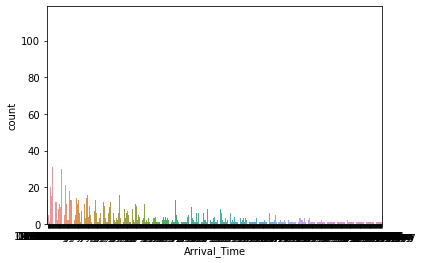

In [32]:
#ploting sns countplot for Arrival Time
ax=sns.countplot(x='Arrival_Time',data=df_visualization_nominal)
print(df_visualization_nominal['Arrival_Time'].value_counts())

* data distribution of Arrival Time

2h 50m     122
1h 30m     107
2h 45m      95
2h 55m      81
3h          72
          ... 
40h 40m      1
24h 20m      1
26h 50m      1
5m           1
30h 45m      1
Name: Duration, Length: 320, dtype: int64


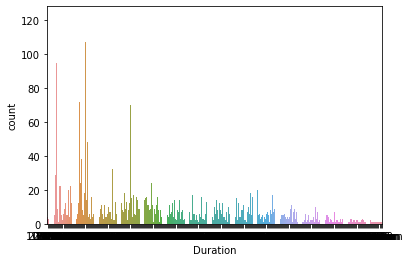

In [33]:
#ploting sns countplot for Duration
ax=sns.countplot(x='Duration',data=df_visualization_nominal)
print(df_visualization_nominal['Duration'].value_counts())

* data distribution of Duration

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64


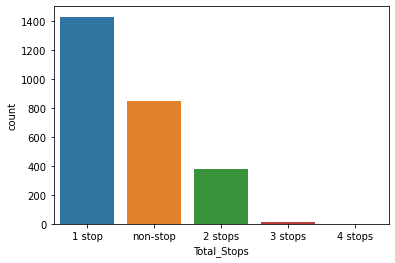

In [34]:
#ploting sns countplot for Total Stops
ax=sns.countplot(x='Total_Stops',data=df_visualization_nominal)
print(df_visualization_nominal['Total_Stops'].value_counts())

* data distribution of total stops

In [35]:
#making datafrme of the ordinal data
df_visualization_ordinal=df[['Airline','Source']].copy()

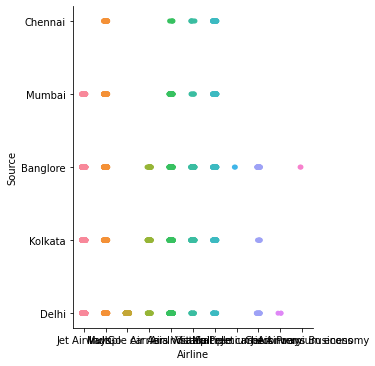

In [36]:
#ploting catplot for Airline and Source
sns.catplot(x='Airline',y='Source',data=df)

* data of airline and source ,x=Airline ,y=Source

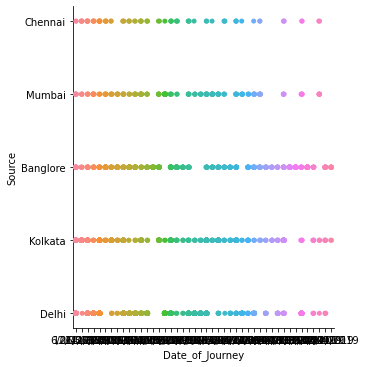

In [37]:
#ploting date of journey and source
sns.catplot(x='Date_of_Journey',y='Source',data=df)

* data visualization contains of date of journey and source

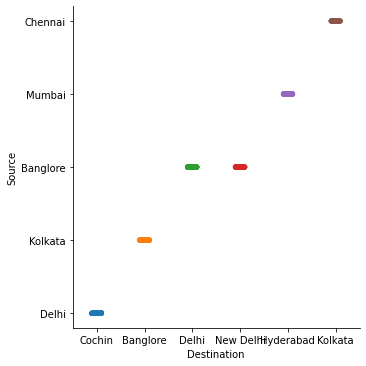

In [38]:
#ploting Destination and Source
sns.catplot(x='Destination',y='Source',data=df)

* This catplot contains the data of destination and source

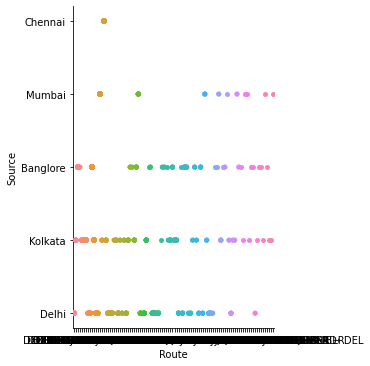

In [39]:
#ploting catplot for route and source
sns.catplot(x='Route',y='Source',data=df)

* This catplot contains the data of route and source

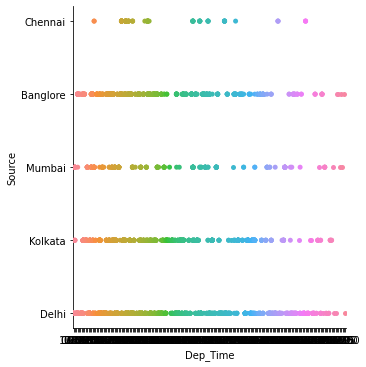

In [40]:
#ploting catplot for deptime and source
sns.catplot(x='Dep_Time',y='Source',data=df)

* This catplot contains the data of Dep_time and source

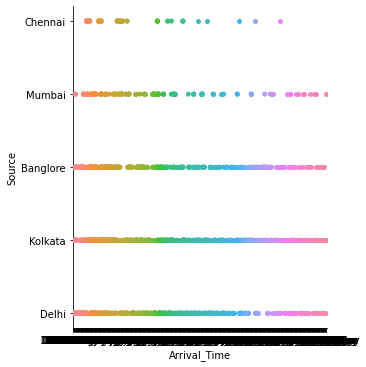

In [42]:
#ploting sns catplot for arrival time
sns.catplot(x='Arrival_Time',y='Source',data=df)

* This catplot contains the data of Arrival Time and source

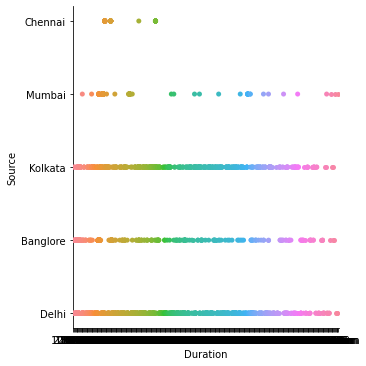

In [43]:
#ploting catplot for duration and source
sns.catplot(x='Duration',y='Source',data=df)

* This catplot contains the data of Duration and source

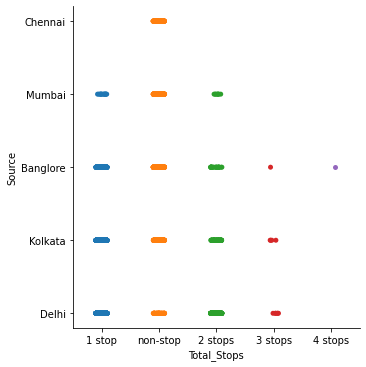

In [44]:
#ploting sns catplot for Total Stops and Source
sns.catplot(x='Total_Stops',y='Source',data=df)

* This catplot contains the data of destination and source

In [45]:
#checking distribution of continuous value of the object type columns
df_visualization_continuous=df[['Total_Stops','Additional_Info','Duration','Arrival_Time','Airline','Source']].copy()

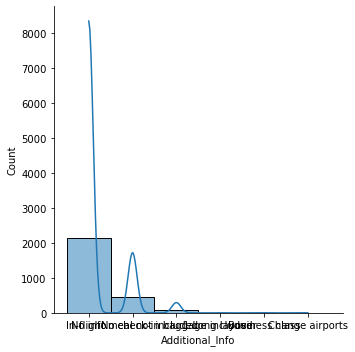

In [46]:
#ploting displot
sns.displot(df_visualization_continuous['Additional_Info'], kde=True)

* Looks like the data distribution not normal because of viscouse

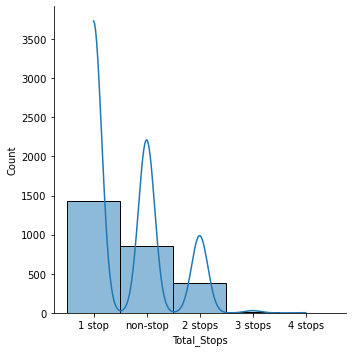

In [48]:
#ploting displot for Total Stops
sns.displot(df_visualization_continuous['Total_Stops'], kde=True)

* Looks like the data distribution not normal because of viscouse

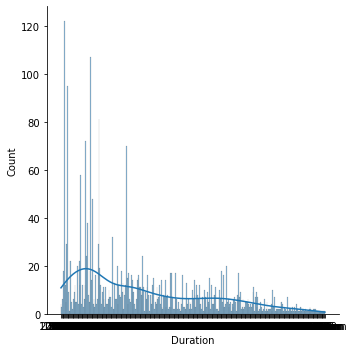

In [50]:
#ploting displot for Duration
sns.displot(df_visualization_continuous['Duration'], kde=True)

* Looks like the data distribution not normal because of viscouse

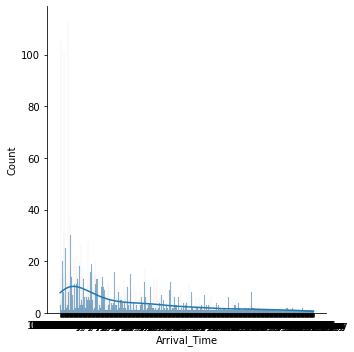

In [51]:
#ploting displot for Arrival time
sns.displot(df_visualization_continuous['Arrival_Time'], kde=True)

* Looks like the data distribution not normal because of viscouse

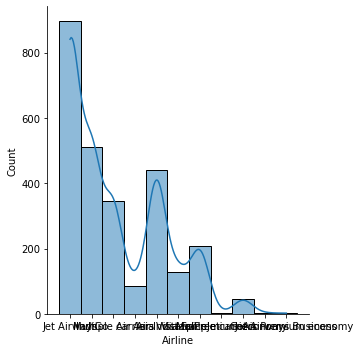

In [52]:
#ploting displot for Airline
sns.displot(df_visualization_continuous['Airline'], kde=True)

* Looks like the data distribution not normal because of viscouse

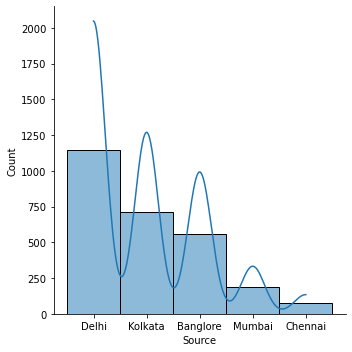

In [54]:
#ploting displot for source
sns.displot(df_visualization_continuous['Source'], kde=True)

* Looks like the data distribution not normal because of viscouse

### Encoding Method

In [56]:
#importing Label Encoder
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Additional_Info']=LE.fit_transform(df['Additional_Info'])

In [57]:
#checking unique
df.Additional_Info.unique()

array([5, 3, 4, 0, 1, 2])

In [58]:
#checking head
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,5
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,3
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,5


In [59]:
#encoding Airline
LE=LabelEncoder()
df['Airline']=LE.fit_transform(df['Airline'])

In [60]:
#checking unique
df.Airline.unique()

array([ 4,  3,  6,  0,  1,  9,  8, 10,  2,  7,  5])

In [63]:
#encoding date of journey
LE=LabelEncoder()
df['Date_of_Journey']=LE.fit_transform(df['Date_of_Journey'])

In [62]:
#checkig unique
df.Date_of_Journey.unique()

array([39, 10, 22, 27, 11,  8,  6, 12, 18, 20, 15, 14, 35,  2, 24, 36, 42,
       16, 37,  7, 32, 28, 43, 34,  5, 19, 13, 38, 40, 33, 31, 23, 21, 17,
       41, 26,  0,  3, 30,  1, 29,  4, 25,  9])

In [64]:
#encoding source
LE=LabelEncoder()
df['Source']=LE.fit_transform(df['Source'])

In [65]:
#checkign unique
df.Source.unique()

array([2, 3, 0, 4, 1])

In [66]:
#encoding Destination
LE=LabelEncoder()
df['Destination']=LE.fit_transform(df['Destination'])

In [67]:
#checking unique
df.Destination.unique()

array([1, 0, 2, 5, 3, 4])

In [68]:
#encoding route
LE=LabelEncoder()
df['Route']=LE.fit_transform(df['Route'])

In [69]:
#checking unique
df.Route.unique()

array([76, 65, 16, 24, 57, 43, 45, 92, 83,  5, 51, 88, 74, 33, 68, 99, 46,
       75, 84, 93, 60, 50, 78, 62, 91, 58, 77, 56, 15, 10, 40,  0, 30, 80,
       87, 82, 52, 18,  4, 85, 70, 96, 94, 67, 20,  8,  6, 69, 39, 21, 61,
       47, 72, 25, 73, 19,  3, 79, 71, 48, 23, 64, 97, 14, 98, 29, 44, 89,
       95, 81,  7,  2, 36, 55, 11,  1, 37, 54, 90, 63, 66, 35, 13, 27, 49,
       31, 34, 53, 17,  9, 86, 41, 26, 22, 38, 28, 12, 42, 59, 32])

In [70]:
#encoding departure time
LE=LabelEncoder()
df['Dep_time']=LE.fit_transform(df['Dep_Time'])

In [71]:
#checking unique
df.Dep_Time.unique()

array(['17:30', '06:20', '19:15', '08:00', '23:55', '18:15', '07:30',
       '15:15', '10:10', '16:30', '13:55', '06:50', '09:00', '05:45',
       '21:25', '13:15', '09:55', '22:55', '10:45', '20:00', '05:30',
       '21:05', '16:00', '14:00', '22:50', '19:50', '07:10', '05:55',
       '16:55', '18:55', '10:20', '17:10', '13:00', '22:45', '21:00',
       '17:45', '09:25', '14:05', '09:45', '02:00', '11:40', '17:00',
       '06:00', '07:05', '16:45', '19:40', '03:50', '21:15', '11:30',
       '12:00', '21:50', '05:50', '07:55', '09:10', '08:20', '09:30',
       '10:00', '14:55', '22:10', '07:00', '19:55', '19:30', '15:00',
       '05:35', '06:40', '17:15', '21:20', '07:35', '06:55', '17:35',
       '11:15', '20:15', '20:25', '05:40', '15:05', '20:55', '14:25',
       '19:45', '08:25', '22:00', '21:10', '02:15', '08:30', '20:40',
       '14:15', '14:35', '11:10', '19:35', '15:20', '06:10', '22:20',
       '08:35', '14:40', '09:40', '01:30', '08:50', '19:05', '08:55',
       '11:35', '04:

In [72]:
#encoding Arrival time
LE=LabelEncoder()
df['Arrival_Time']=LE.fit_transform(df['Arrival_Time'])

In [73]:
#checking uniue
df.Arrival_Time.unique()

array([150, 353, 566, 633, 135, 432, 662, 620, 442, 554, 488, 577, 355,
       428, 258, 661, 657, 157, 263, 119, 344, 287, 555, 702, 161, 516,
        87, 122, 427, 674, 274, 678, 410, 598, 111,  32, 230, 125, 610,
       548, 481, 663, 455, 603, 499, 399, 408, 527, 240, 570, 419, 549,
       318, 660, 659, 485, 218,  34, 546, 449, 565, 647, 484, 366, 398,
       421, 190, 517, 347,  83, 289, 107, 363, 261, 267, 535, 578, 624,
       220, 158, 211, 539, 350, 120, 600, 345,  68, 640, 324, 658, 590,
       538, 109, 151, 619, 357, 461, 276, 611, 431, 507, 597, 138, 440,
       493, 189, 379, 667, 403, 323,  36, 504, 177, 266,  16, 607, 412,
       634, 482, 518, 278,  62, 510, 508,  30, 143, 365, 542, 621,  64,
       648, 382, 103,  65, 316, 474, 581, 460, 390, 162, 249, 377, 509,
       395, 381, 255, 224, 506, 116, 104, 483, 650, 334,  85, 606, 144,
       254, 137, 616,  75, 388, 467, 685, 106, 329, 115, 148, 595, 639,
       437, 463, 282, 141, 622, 127, 438,  40, 691, 194, 464,  7

In [74]:
#encoding duration and total stopes 
LE=LabelEncoder()
df['Duration']=LE.fit_transform(df['Duration'])
df['Total_Stops']=LE.fit_transform(df['Total_Stops'])

In [75]:
#checking unique
df.Duration.unique()

array([ 10, 248, 148,  36, 216,  93,  69, 261, 215, 283, 202, 311,   2,
       254,  83,   9, 310,  26, 309,  55,  57,  18,  41,  28, 212, 168,
       102, 284,  19, 295, 241, 110, 214,  90,   7,  29, 111, 147, 210,
       146, 191, 199, 267, 179, 266, 209, 217, 289, 262, 172,  38, 178,
       263, 304, 287, 122,  70, 293,  81, 269,  44,  22,  39,  92, 197,
       259, 143, 108, 109,  40, 274,   1, 253,  12,  27,  59,  99,  43,
       317, 213, 286, 141,   4, 270, 137, 303,  17,  65, 294,  33, 167,
         3, 301,  32,  25, 135, 292, 129, 277, 211, 171, 230,  16,  60,
        51, 296, 123, 183,  79, 319,  78,  14, 139,  88, 142, 166, 149,
        50, 161,   5, 104, 275, 188, 312, 260, 291, 278, 201,  52, 106,
       236, 255, 276, 127, 246, 257,  71, 280,  20, 272, 134, 100, 152,
        53, 118,  72, 298, 300, 151, 103, 165, 125, 256,  94, 258,  77,
       196, 162, 282, 299, 175, 308, 121, 144, 190, 126,  63,  47, 200,
        54,  13, 113, 154,  24, 114, 192, 119,  23,  30, 164,   

In [76]:
#checkiing total stop
df.Total_Stops.unique()

array([0, 4, 1, 2, 3])

In [77]:
#checking head of dataset
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Dep_time
0,4,39,2,1,76,17:30,150,10,0,5,138
1,3,10,3,0,65,06:20,353,248,0,5,31
2,4,22,2,1,76,19:15,566,148,0,3,156
3,6,22,2,1,76,08:00,633,36,0,5,48
4,0,27,0,2,16,23:55,135,216,4,5,198


* Now all the columns look good

### Importing Train Dataset

In [78]:
#reading data train dataset
df=pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [79]:
#checking null values 
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

* Here Route and Total Stops have some value rest all of the columns is zero

In [80]:
#describeing dataset
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [82]:
#importing visualisation librerys
import matplotlib.pyplot as plt


<AxesSubplot:>

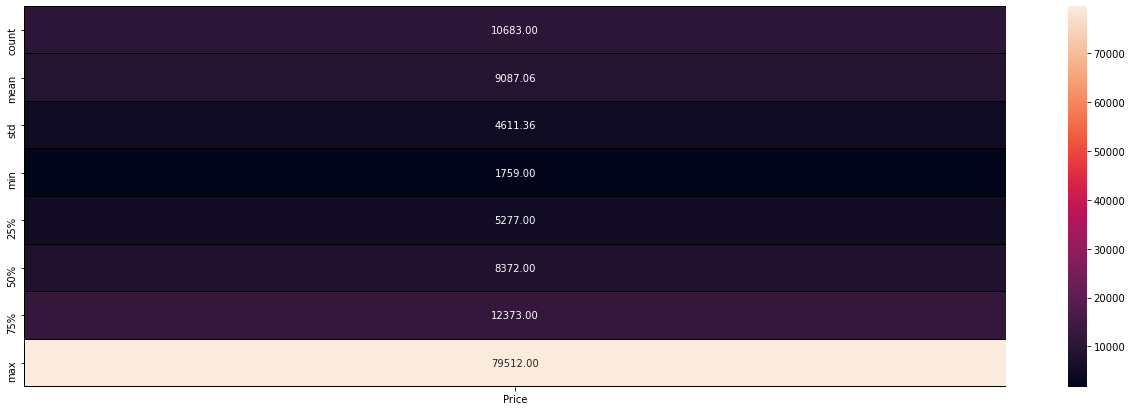

In [83]:
#ploting heatmap
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

* light shades are highly descibe

### Correlation 

In [84]:
#checking correlation
df.corr()

,Price
Price,1.0


<AxesSubplot:>

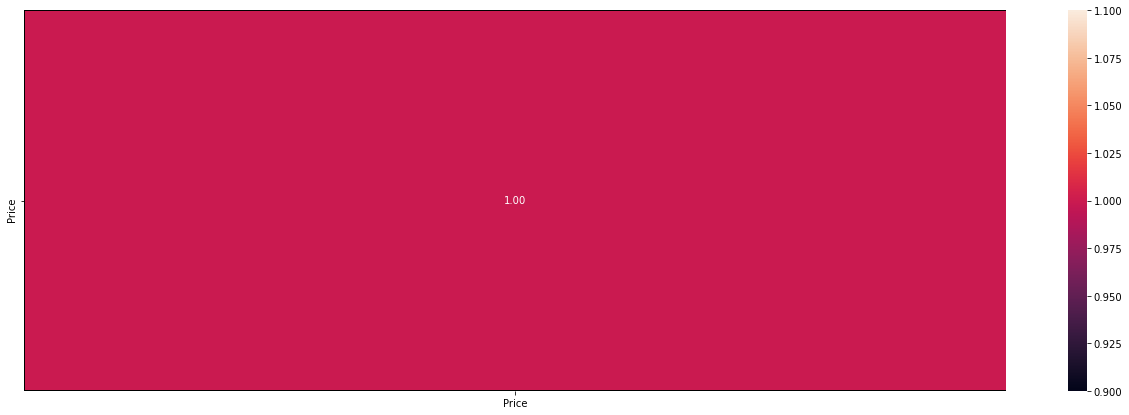

In [85]:
#ploting heatmap
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

* Dataset contains one corresponding value.
* Light shades are hihgly correlated

In [86]:
#checking skewness
df.skew()

Price    1.812552
dtype: float64

* price has skewness value

In [87]:
#checking outlier
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

* Except price all are object type

<AxesSubplot:>

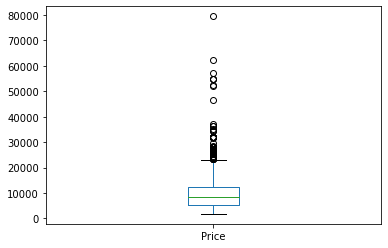

In [89]:
#checking ouliers
df['Price'].plot.box()

* There is a outliers in this beacouse of viscous problem

In [90]:
#checking shape
df.shape

(10683, 11)

* dataset contains 10683 rows and 11 columns 

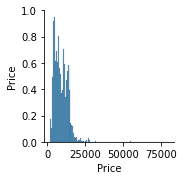

In [91]:
#ploting pairplot
sns.pairplot(df)

* There are some missing values 
* Have to drop nagative correlated columns
* Have to remove the outliers.

In [92]:
#droping Date of journey 
df.drop('Date_of_Journey',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [93]:
#checking data shape
df.shape

(10683, 10)

* Now dataset conteains 10683 rows and 10 columns

### Encoding Method

In [94]:
#encoding 
LE=LabelEncoder()
df['Airline']=LE.fit_transform(df['Airline'])

In [95]:
#checking unique
df.Airline.unique()

array([ 3,  1,  4,  8,  6,  2, 10,  0, 11,  5,  7,  9])

In [96]:
#checking head
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,1,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,4,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,3,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,3,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [99]:
#encoding 
LE=LabelEncoder()
df['Source']=LE.fit_transform(df['Source'])

In [100]:
#checking unique
df.Source.unique()

array([0, 3, 2, 1, 4])

In [101]:
#encoding 
LE=LabelEncoder()
df['Destination']=LE.fit_transform(df['Destination'])

In [102]:
#checking unique
df.Destination.unique()

array([5, 0, 1, 4, 2, 3])

In [103]:
#encoding 
LE=LabelEncoder()
df['Arrival_Time']=LE.fit_transform(df['Arrival_Time'])

In [105]:
#checking unique
df.Arrival_Time.unique()

array([ 233,  906,  413, ...,  495,   25, 1235])

In [106]:
#encoding 
LE=LabelEncoder()
df['Additional_Info']=LE.fit_transform(df['Additional_Info'])

In [107]:
#checking unique
df.Additional_Info.unique()

array([8, 5, 7, 1, 6, 0, 4, 3, 9, 2])

In [108]:
#encoding 
LE=LabelEncoder()
df['Duration']=LE.fit_transform(df['Duration'])

In [109]:
#checking unique
df.Duration.unique()

array([240, 336, 106, 311, 303, 235,  65, 145, 185, 341,  38, 237, 233,
        25, 198, 300, 151, 156, 128, 308,  63, 241,  39,  61, 315, 317,
        40, 146, 312,   4, 309, 236, 322,  22,  23, 349, 155, 239,  24,
        83, 116, 282, 183, 280,  74,  71, 325, 191,  28, 206,   2,   5,
       121, 120, 197, 335,  41, 307, 117,  57, 238, 147, 362,   0, 137,
       103,  27,  95, 358,  88,  78,  26, 337, 168, 354, 333,  53, 245,
        60,  32,   1,  64,  59, 125, 157,  96,  72, 234, 344,  82, 281,
        48, 165, 141, 136,   9, 346, 350,  21, 209, 348, 132, 304, 345,
       172, 162, 188, 193, 222, 182, 359, 357, 288,  17, 361,  89, 318,
       189, 123,  36,  99, 169, 305, 186, 323, 102, 110, 226, 367,   8,
        19, 154, 274, 187,  46, 351, 161,  30, 170, 119,  12,  14,  54,
        34, 356, 339,  20, 178,  94, 231, 148,  55, 334, 124, 130, 204,
       173, 127, 313,  56, 314, 306,  70, 340, 218, 298, 285, 353, 164,
       176, 140, 355, 324,  69, 196, 177, 192, 167, 342, 195, 15

In [110]:
#encoding 
LE=LabelEncoder()
df['Dep_Time']=LE.fit_transform(df['Dep_Time'])

In [111]:
#checking uniqe
df.Dep_Time.unique()

array([211,  31,  70, 164, 149,  66, 172,  55,  65,  91,  74, 188,  94,
       198, 154, 147,  63, 118, 187, 141, 120, 207,  16, 201, 205,  45,
        46,  75, 125,  83, 130, 121,  42, 195,  88,  30, 173, 218,  86,
        72, 199, 221, 181,  64, 137,  34, 129, 117,  32, 111,  23,  38,
       157,  58, 183,  39, 119,   7,  73,  59, 189, 110,   9, 150, 193,
        25, 182, 184,  35, 178,  19, 106, 165, 155, 134, 217,  98, 127,
        96,  92, 126, 175,  33, 220,  52, 108, 103, 131, 105, 167, 145,
         3,  43, 107, 176,   4, 151,  77, 179, 135, 100, 142, 191, 212,
       197,  28,  24,  41, 132,   2,  60,  47,  27, 123,  26,  80, 160,
       109, 209,  21, 161, 200,  37, 140, 190, 156,  71,  51,  11,  85,
       153,  67, 171, 133, 215, 128, 122, 112, 210,  87, 143, 186,  44,
       174,  54,  53,  79,  57,  93, 196, 162, 148, 166,  15,  61, 177,
       185, 159,  18, 158,  76,  22, 163,  12, 192, 216, 213, 202,  56,
       152,  50, 138,  68, 139,  95, 208, 169,   1, 180, 194, 21

In [112]:
#cheking head
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,0,5,BLR → DEL,211,233,240,non-stop,8,3897
1,1,3,0,CCU → IXR → BBI → BLR,31,906,336,2 stops,8,7662
2,4,2,1,DEL → LKO → BOM → COK,70,413,106,2 stops,8,13882
3,3,3,0,CCU → NAG → BLR,164,1324,311,1 stop,8,6218
4,3,0,5,BLR → NAG → DEL,149,1237,303,1 stop,8,13302


In [113]:
#checking colinms
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price'],
      dtype='object')

* Dataest contains 10 columns.

In [114]:
#droping route and total_stops
df.drop(['Route','Total_Stops'],axis=1,inplace=True)

In [115]:
#checking dataset head
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Additional_Info,Price
0,3,0,5,211,233,240,8,3897
1,1,3,0,31,906,336,8,7662
2,4,2,1,70,413,106,8,13882
3,3,3,0,164,1324,311,8,6218
4,3,0,5,149,1237,303,8,13302


In [116]:
#checking null value
df.isnull().sum()

Airline            0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Additional_Info    0
Price              0
dtype: int64

* Dataset contains some of null values is zero

In [117]:
#removing null values by mean and median
df['Airline']=df['Airline'].fillna(df['Airline'].mean())
df['Source']=df['Source'].fillna(df['Source'].median())

In [118]:
#checking skewness
df.skew()

Airline            0.731095
Source            -0.424054
Destination        1.244169
Dep_Time           0.195055
Arrival_Time      -0.606530
Duration          -0.213427
Additional_Info   -1.779838
Price              1.812552
dtype: float64

* Dataset contains skewness in some columns 

### Removing Outliers

In [119]:
#importing zscore
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.41067545, 1.65844074, 2.41666505, ..., 0.42287466, 0.49989167,
        1.12554821],
       [1.26099927, 0.89005213, 0.97382594, ..., 1.30672664, 0.49989167,
        0.30904789],
       [0.01448647, 0.04055451, 0.29572775, ..., 0.81083539, 0.49989167,
        1.03985835],
       ...,
       [0.01448647, 1.65844074, 0.38237045, ..., 0.79114632, 0.49989167,
        0.40295085],
       [2.56545795, 1.65844074, 2.41666505, ..., 0.40446108, 0.49989167,
        0.77224576],
       [1.26099927, 0.04055451, 0.29572775, ..., 1.40800134, 0.49989167,
        0.57815073]])

* Removed the outliers

In [120]:
#threshold
threshold=3
print(np.where(z>3))

(array([  123,   396,   486,   510,   597,   628,   657,   785,   785,
         826,   936,   946,   959,   975,  1043,  1196,  1246,  1341,
        1424,  1466,  1478,  1629,  1654,  1785,  1918,  2055,  2079,
        2099,  2108,  2405,  2481,  2495,  2495,  2556,  2556,  2618,
        2635,  2693,  2924,  2924,  3032,  3032,  3111,  3111,  3257,
        3400,  3535,  3700,  3700,  3788,  4012,  4521,  4521,  4676,
        4829,  5013,  5013,  5136,  5372,  5372,  5439,  5628,  5662,
        5701,  5710,  5719,  5738,  5745,  5856,  5986,  6024,  6314,
        6336,  6407,  6576,  6576,  6588,  6605,  6991,  7351,  7356,
        7377,  7537,  7554,  7617,  7713,  7724,  7724,  7756,  7902,
        8020,  8080,  8451,  8470,  8536,  8598,  8856,  8940,  8957,
        8957,  8990,  9019,  9019,  9193,  9239,  9632,  9657,  9715,
        9974, 10052, 10113, 10160, 10182, 10189, 10353, 10364, 10364,
       10383, 10439, 10511, 10511]), array([7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 6, 

In [121]:
# new dataset
df_new=df[(z<3).all(axis=1)]
df_new

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Additional_Info,Price
0,3,0,5,211,233,240,8,3897
1,1,3,0,31,906,336,8,7662
2,4,2,1,70,413,106,8,13882
3,3,3,0,164,1324,311,8,6218
4,3,0,5,149,1237,303,8,13302
...,...,...,...,...,...,...,...,...
10678,0,3,0,183,1259,236,8,4107
10679,1,3,0,193,1305,237,8,4145
10680,4,0,2,58,824,280,8,7229
10681,10,0,5,92,938,238,8,12648


* Dataset contains 10578 rows and 8 columns.

In [122]:
#checking shape
df.shape


(10683, 8)

* dataset contains 10683 rows and 8 columns

In [124]:
#checking shape
df_new.shape

(10578, 8)

* new dataset contains 10578 rows and 8 columns

In [128]:
#importing standered method 
from sklearn.preprocessing import StandardScaler

In [129]:
# standard scaler method
scaler=StandardScaler()
scaledX=scaler.fit_transform(df)

In [130]:
scaledX

array([[-0.41067545, -1.65844074,  2.41666505, ...,  0.42287466,
         0.49989167, -1.12554821],
       [-1.26099927,  0.89005213, -0.97382594, ...,  1.30672664,
         0.49989167, -0.30904789],
       [ 0.01448647,  0.04055451, -0.29572775, ..., -0.81083539,
         0.49989167,  1.03985835],
       ...,
       [ 0.01448647, -1.65844074,  0.38237045, ...,  0.79114632,
         0.49989167, -0.40295085],
       [ 2.56545795, -1.65844074,  2.41666505, ...,  0.40446108,
         0.49989167,  0.77224576],
       [-1.26099927,  0.04055451, -0.29572775, ...,  1.40800134,
         0.49989167,  0.57815073]])

In [131]:
#importing PCA
from sklearn.decomposition import PCA

In [132]:
#applying PCA
testpca=PCA()
Y=testpca.fit(scaledX)

In [133]:
#variance
Y.explained_variance_ratio_

array([0.2076876 , 0.14460308, 0.13320377, 0.12959327, 0.12464396,
       0.10903691, 0.10426519, 0.04696621])

In [135]:
var_cumu=np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 20.76875986,  35.22906744,  48.54944475,  61.50877202,
        73.97316832,  84.8768598 ,  95.30337909, 100.        ])

In [136]:
k=np.argmax(var_cumu>99)
print('Number of componets explaining 99% variance:',k)

Number of componets explaining 99% variance: 7


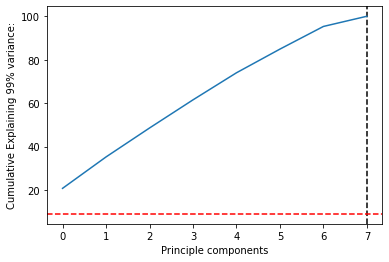

In [138]:
#ploting 
plt.ylabel('Cumulative Explaining 99% variance:')
plt.xlabel('Principle components')
plt.axvline(x=k, color='k',linestyle='--')
plt.axhline(y=9, color='r',linestyle='--')

plt.plot(var_cumu)
plt.show()

* Here y label contains cumulative explained varience and xlabel contains principle components.

## Model Building 

In [139]:
x_train=df.drop(['Source'],axis=1)
y_train=df.Source

In [140]:
x_train.head()

,Airline,Destination,Dep_Time,Arrival_Time,Duration,Additional_Info,Price
0,3,5,211,233,240,8,3897
1,1,0,31,906,336,8,7662
2,4,1,70,413,106,8,13882
3,3,0,164,1324,311,8,6218
4,3,5,149,1237,303,8,13302


In [141]:
y_train.head()

0    0
1    3
2    2
3    3
4    0
Name: Source, dtype: int64

In [142]:
x_train.shape

(10683, 7)

* x trian contains 10683 rows and zero columns.

In [143]:
y_train.shape

(10683,)

* y_train contains 10683 rows and zero columns.

## Regressor Methods

In [144]:
#importing train test split 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [145]:
x=df.drop(['Source'],axis=1)
y=df['Source']
x_train, x_test, y_train, y_test=train_test_split(x,y, random_state=0, test_size=0.2)

In [146]:
#importing mean squared error
from sklearn.metrics import mean_squared_error
for i in range(200):
    x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeRegressor
    lm=DecisionTreeRegressor()
    lm.fit(x_train,y_train)
    y_pred=lm.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    print(rmse)

0.023816275411477048
0.07144882623443113
0.11788454892243297
0.06943577811935481
0.09674216804911331
0.0673625993842474
0.0
0.09526510164590819
0.09526510164590819
0.11908137705738524
0.0673625993842474
0.13577365970779495
0.023816275411477048
0.0
0.0673625993842474
0.11667544466342449
0.09674216804911331
0.07144882623443113
0.07144882623443113
0.0
0.11908137705738524
0.07144882623443113
0.09674216804911331
0.0673625993842474
0.09819701913032057
0.06943577811935481
0.0673625993842474
0.12026629556580187
0.0
0.16500399623892645
0.07144882623443113
0.07144882623443113
0.09674216804911331
0.11788454892243297
0.06943577811935481
0.09526510164590819
0.09526510164590819
0.1347251987684948
0.09819701913032057
0.09674216804911331
0.07340669082253741
0.023816275411477048
0.023816275411477048
0.11908137705738524
0.09526510164590819
0.0673625993842474
0.09526510164590819
0.0673625993842474
0.01684064984606185
0.06943577811935481
0.0
0.023816275411477048
0.0
0.06943577811935481
0.1347251987684948


## Decision Tree Regresstion

In [147]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [148]:
y_pred=regressor.predict(x_test)

In [149]:
y_pred

array([3., 2., 3., ..., 2., 3., 4.])

In [154]:
dt=round(regressor.score(x_train,y_train)*100,2)
dt

99.95

* Decision Tree hit almost 100% accuracy

## Random Forest Regressor

In [151]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [152]:
y_pred=regressor.predict(x_test)
y_pred

array([3., 2., 3., ..., 2., 3., 4.])

In [155]:
rf=round(regressor.score(x_train,y_train)*100,2)
rf

99.95

* The Random Forest Regressor give 99.95% accuracy

## Linear Regression

In [157]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [158]:
y_pred=regressor.predict(x_test)
y_pred

array([2.58589889, 1.78149605, 2.78661624, ..., 2.61326875, 2.30429324,
       1.32403676])

In [159]:
lr=round(regressor.score(x_train,y_train)*100,2)
lr

38.17

* The Linear Regression hit 38.17% accuracy

## GaussianNB

In [161]:
from sklearn.naive_bayes import GaussianNB
regressor=GaussianNB()
regressor.fit(x_train,y_train)

GaussianNB()

In [162]:
y_pred=regressor.predict(x_test)
y_pred

array([3, 2, 3, ..., 2, 3, 4])

In [163]:
nb=round(regressor.score(x_train,y_train)*100,2)
nb

99.46

* the GaussianNB hit 99.46% accuracy.

## SVR

In [165]:
from sklearn.svm import SVR
regressor=SVR()
regressor.fit(x_train,y_train)

SVR()

In [166]:
y_pred=regressor.predict(x_test)
y_pred

array([2.21643584, 2.09116445, 1.99192579, ..., 2.11599819, 2.10227686,
       2.13312899])

In [167]:
svm=round(regressor.score(x_train,y_train)*100,2)
svm

1.26

* The SVM hitb 1.26 accuracy.

## KNeighbors Regressor

In [169]:
from sklearn.neighbors import KNeighborsRegressor
regressor=KNeighborsRegressor()
regressor.fit(x_train,y_train)

KNeighborsRegressor()

In [170]:
y_pred=regressor.predict(x_test)
y_pred

array([3. , 2.2, 2. , ..., 2. , 3. , 2. ])

In [172]:
knn=round(regressor.score(x_train,y_train)*100,2)
knn

75.24

* The knn hit 75.24% accuracy.

## Cross Validation Method

In [174]:
#importing cross vaidation
from sklearn.model_selection import cross_val_score

In [175]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.9976991834900915


In [176]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.9971883018241996


In [178]:
from sklearn.svm import SVR
regressor=SVR()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.015245839722675281


In [179]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.3853045693095896


In [180]:
from sklearn.neighbors import KNeighborsRegressor
regressor=KNeighborsRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.6410485696020395


In [181]:
from sklearn.naive_bayes import GaussianNB
regressor=GaussianNB()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.9944773204061137


## Hyperparameter Tunings

In [182]:
#importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [183]:
parameter={'max_depth':[1,3,5,7,9,11,12],
           'criterion':['mse','friedman_mse']}

In [184]:
GCV=GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [185]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12]})

In [186]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12]})

In [187]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 12}

## Evaluating Final Model

In [188]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(x_train,y_train)
Final_mod=DecisionTreeRegressor()
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
print(regressor.score(x_test,y_test)*100)

99.95854993178548


## Saving Model

In [189]:
import joblib
joblib.dump(Final_mod,'Flight Price Prediction.csv')

['Flight Price Prediction.csv']

* Model Saved

## Prediction Method

In [191]:
Final_mod=DecisionTreeRegressor()
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
preds=regressor.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[3. 2. 3. 3. 2. 2. 0. 2. 3. 2. 0. 2. 3. 2. 3. 0. 0. 2. 2. 0. 2. 3. 0. 0.
 0. 2. 0. 2. 2. 3. 3. 3. 1. 2. 3. 3.]
[3 2 3 3 2 2 0 2 3 2 0 2 3 2 3 0 0 2 2 0 2 3 0 0 0 2 0 2 2 3 3 3 1 2 3 3]


* The train test data is balanced most of the regressor method hit 99% accuracy with the dataset.